In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mandelbrot import is_point_in_mandelbrot
from utilities import Utilities, plot_multiple_simulations

In [11]:
def compare_variances(n_samples=10000, n_strata=10, iters=100, xy_range=(-2, 2)):
    # Regular Monte Carlo
    l, u = xy_range
    total_area = (u - l)**2
    mc_areas = np.zeros(iters)
    
    for j in range(iters):
        x = np.random.uniform(l, u, n_samples)
        y = np.random.uniform(l, u, n_samples)
        indicators = np.array([is_point_in_mandelbrot(x[i], y[i], 1000) 
                             for i in range(n_samples)])
        
        mc_p = indicators.mean()
        mc_areas[j] = mc_p * total_area
    
    mc_variance = np.var(mc_areas)
    
    # Stratified sampling
    strata_size = (u - l) / n_strata
    samples_per_stratum = n_samples // (n_strata * n_strata)
    stratum_areas = np.zeros(iters)
    
    for k in range(iters):
        total_estimate = 0
        for i in range(n_strata):
            for j in range(n_strata):
                x_min = l + i * strata_size
                x_max = l + (i + 1) * strata_size
                y_min = l + j * strata_size
                y_max = l + (j + 1) * strata_size
                
                # Sample points in this stratum
                x = np.random.uniform(x_min, x_max, samples_per_stratum)
                y = np.random.uniform(y_min, y_max, samples_per_stratum)
                
                # Compute indicators for this stratum
                stratum_indicators = np.array([is_point_in_mandelbrot(x[m], y[m], 1000) 
                                            for m in range(samples_per_stratum)])
                
                # Compute proportion in this stratum
                stratum_p = stratum_indicators.mean()
                
                # Area of this stratum
                stratum_area = strata_size * strata_size
                
                # Add this stratum's contribution to total
                total_estimate += stratum_p * stratum_area
                
        stratum_areas[k] = total_estimate
    
    strat_variance = np.var(stratum_areas)
    
    return (mc_areas.mean(), mc_variance, 
            stratum_areas.mean(), strat_variance)

In [46]:
def compare_variances(n_samples=10000, n_strata=10, xy_range = (-2, 2)):
    # Regular Monte Carlo
    l = xy_range[0]
    u = xy_range[1]
    x = np.random.uniform(l, u, n_samples)
    y = np.random.uniform(l, u, n_samples)

    indicators = np.zeros(n_samples)

    for i in range(n_samples):
        indicators[i] = is_point_in_mandelbrot(x[i], y[i], 100)
            
    mc_p = indicators.sum() / n_samples
    mc_area = mc_p * (u - l)**2
    mc_variance = np.var(indicators) / n_samples
    
    # Stratified sampling
    strata_size = (u - l) / n_strata
    strat_variance = 0
    samples_per_stratum = n_samples // (n_strata * n_strata)
    
    stratum_area = np.zeros(n_strata * n_strata)

    for i in range(n_strata):
        for j in range(n_strata):
            x_min, x_max = l + i*strata_size, l + (i+1)*strata_size
            y_min, y_max = l + j*strata_size, l + (j+1)*strata_size
            
            x = np.random.uniform(x_min, x_max, samples_per_stratum)
            y = np.random.uniform(y_min, y_max, samples_per_stratum)
            
            stratum_indicators = np.zeros(samples_per_stratum)
            
            for k in range(samples_per_stratum):
                stratum_indicators[k] = is_point_in_mandelbrot(x[k], y[k], 100)
            
            stratum_p = stratum_indicators.sum() / samples_per_stratum
            stratum_area[i*n_strata + j] = stratum_p * (x_max - x_min) * (y_max - y_min)

            # Weight the variance by stratum volume
            weight = (strata_size * strata_size) / ((u - l)**2)
            strat_variance += weight**2 * np.var(stratum_indicators) / samples_per_stratum
    
    return mc_area, mc_variance, stratum_area.sum(), strat_variance

In [12]:
n_sampling_range = np.logspace(2, 4, 10, dtype=int)
mc_var, strat_var = np.zeros(len(n_sampling_range)), np.zeros(len(n_sampling_range))
mc_area, strat_area = np.zeros(len(n_sampling_range)), np.zeros(len(n_sampling_range))

for i, n in enumerate(n_sampling_range):
    mc_area[i], mc_var[i], strat_area[i], strat_var[i] = compare_variances(n, 10, 100, (-2, 2))
    print(f"n = {n} -> Monte Carlo variance: {mc_var[i]:.6f}")
    print(f"n = {n} -> Stratified variance: {strat_var[i]:.6f}")
    print(f"n = {n} -> Variance reduction factor: {mc_var[i]/strat_var[i]:.2f}x")

n = 100 -> Monte Carlo variance: 0.201859
n = 100 -> Stratified variance: 0.066724
n = 100 -> Variance reduction factor: 3.03x
n = 166 -> Monte Carlo variance: 0.120694
n = 166 -> Stratified variance: 0.066752
n = 166 -> Variance reduction factor: 1.81x
n = 278 -> Monte Carlo variance: 0.082508
n = 278 -> Stratified variance: 0.029324
n = 278 -> Variance reduction factor: 2.81x
n = 464 -> Monte Carlo variance: 0.043936
n = 464 -> Stratified variance: 0.012635
n = 464 -> Variance reduction factor: 3.48x
n = 774 -> Monte Carlo variance: 0.031838
n = 774 -> Stratified variance: 0.009341
n = 774 -> Variance reduction factor: 3.41x
n = 1291 -> Monte Carlo variance: 0.014998
n = 1291 -> Stratified variance: 0.005657
n = 1291 -> Variance reduction factor: 2.65x
n = 2154 -> Monte Carlo variance: 0.012006
n = 2154 -> Stratified variance: 0.003298
n = 2154 -> Variance reduction factor: 3.64x
n = 3593 -> Monte Carlo variance: 0.006249
n = 3593 -> Stratified variance: 0.001435
n = 3593 -> Variance

In [5]:
mc_confint

array([0.09770842, 0.05229385, 0.03439521, 0.0195794 , 0.01145813,
       0.00655289, 0.0038326 , 0.00262913, 0.00152135, 0.00090833])

Areas: [1.5088     1.46698795 1.5228777  1.46586207 1.52082687 1.49812548
 1.50269266 1.51022544 1.50692025 1.510912  ]


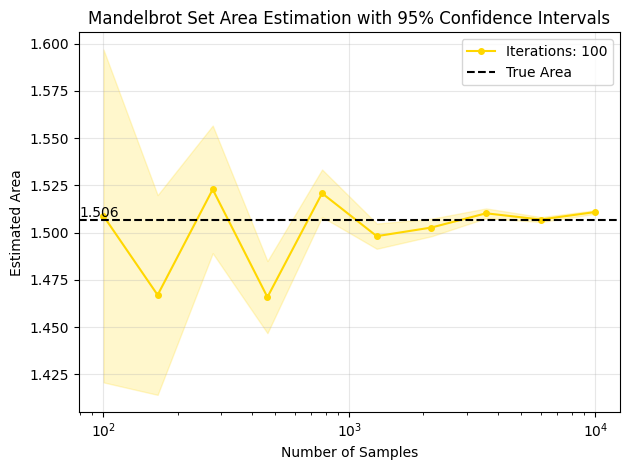

Areas: [1.5296     1.496      1.5272     1.5308     1.49942857 1.51186667
 1.50552381 1.50459429 1.50901695 1.508208  ]


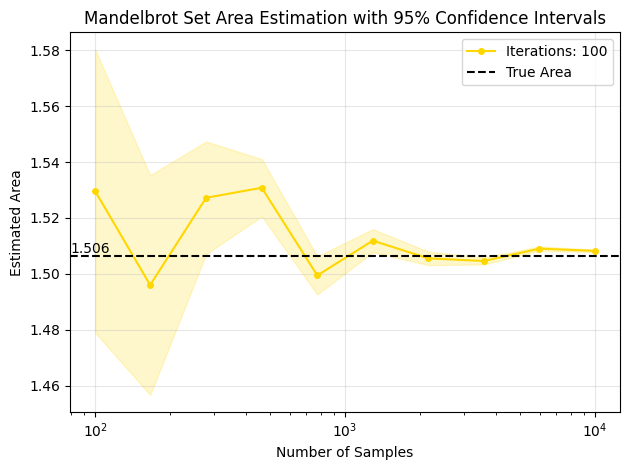

In [13]:
mc_confint = 1.96 * mc_var**0.5 / np.sqrt(n_sampling_range)
strat_confint = 1.96 * strat_var**0.5 / np.sqrt(n_sampling_range)

plot_multiple_simulations([100], n_sampling_range, [mc_area], [mc_confint], 
                          "monte_carlo")
plot_multiple_simulations([100], n_sampling_range, [strat_area], [strat_confint], 
                          "stratified")

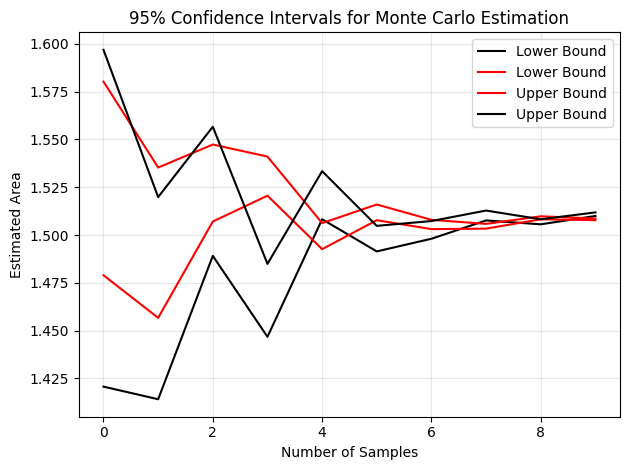

In [14]:
plt.plot(mc_area - mc_confint, 'k', label="Lower Bound")
plt.plot(strat_area - strat_confint, 'r', label="Lower Bound")
plt.plot(strat_area + strat_confint, 'r', label="Upper Bound")
plt.plot(mc_area + mc_confint, 'k',label="Upper Bound")
plt.xlabel("Number of Samples")
plt.ylabel("Estimated Area")
plt.title("95% Confidence Intervals for Monte Carlo Estimation")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

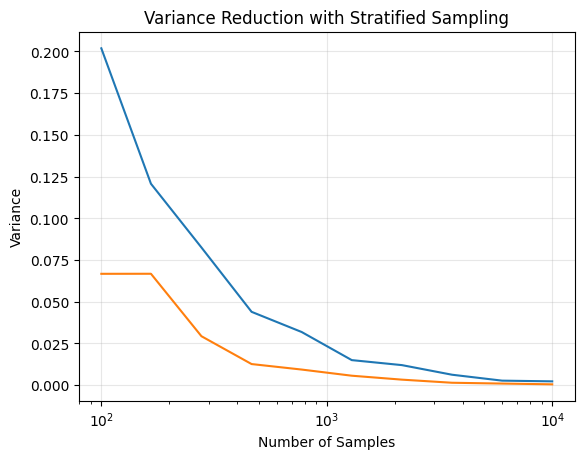

In [15]:
plt.plot(n_sampling_range, mc_var, label="Monte Carlo")
plt.plot(n_sampling_range, strat_var, label="Stratified")
plt.xscale('log')
plt.xlabel("Number of Samples")
plt.ylabel("Variance")
plt.title("Variance Reduction with Stratified Sampling")
plt.legend
plt.grid(True, alpha=0.3)
plt.tight_layout

In [ ]:
iters = 1000
n_samples = 10000

l, u = (-2, 2)
total_area = (u - l)**2
mc_areas = np.zeros(iters)

for j in range(iters):
    x = np.random.uniform(l, u, n_samples)
    y = np.random.uniform(l, u, n_samples)
    indicators = np.array([is_point_in_mandelbrot(x[i], y[i], 100) 
                            for i in range(n_samples)])
    
    mc_p = indicators.mean()
    mc_areas[j] = mc_p * total_area

mc_variance = np.var(mc_areas)
theoretical_variance = mc_p * (1 - mc_p) / n_samples

print(f"Estimated Variance: {mc_variance:.6f}")
print(f"Theoretical Variance: {theoretical_variance:.6f}")

Estimated Variance: 0.002230
Theoretical Variance: 0.008968


Does the estimated variance converge to the theoretical one?  
Assume

$$ \mathbb{V}[A] = \mathbb{V}\left[\frac{1}{N} \sum_i A_i \right], \qquad A_i N \sim Bin(N, p) $$

where $A_iN\rightarrow p(b-a)^2=A$ and $\mathbb{E}[A_iN] \rightarrow \mathbb{E}[A]$.  
Then

$$ \mathbb{V} \left[\frac{1}{N} \sum_i A_i \right] =  \mathbb{V} \left[\frac{1}{N^2} \sum_i A_i N \right] = $$ 
$$= \frac{1}{N^2} \mathbb{V} \left[\sum_i A_i N \right] = \frac{1}{N^2} Np(1-p) = \frac{p(1-p)}{N}$$ 

In [17]:
from scipy.stats import norm

def importance_sampling_mandelbrot(n_samples=10000, iters=100, xy_range=(-2, 2)):
    """
    Compute Mandelbrot set area using importance sampling with normal distribution
    """
    l, u = xy_range
    total_area = (u - l)**2
    
    # Parameters for importance sampling distribution
    # We'll use a normal distribution centered at -0.5 (main bulb of Mandelbrot)
    # with standard deviation 0.8 to cover most of the interesting region
    mu_x, sigma_x = -0.45, 0.5
    mu_y, sigma_y = 0, 0.5
    
    is_areas = np.zeros(iters)
    
    for j in range(iters):
        # Generate samples from normal distribution
        
        x_vect = np.random.normal(mu_x, sigma_x, n_samples)
        y_vect = np.random.normal(mu_y, sigma_y, n_samples)
        
        # Calculate weights (ratio of target/proposal distributions)
        # Target is uniform over [l,u]×[l,u], so its density is 1/total_area
        # Proposal is normal, we need its density
        weights = (1 / total_area) / (
            norm.pdf(x_vect, mu_x, sigma_x) * norm.pdf(y_vect, mu_y, sigma_y))

        # Compute indicators
        indicators = np.array([is_point_in_mandelbrot(x_vect[i], y_vect[i], 1000) 
                             for i in range(n_samples)])

        # Compute weighted average
        is_areas[j] = np.mean(indicators * weights) * total_area
    
    is_variance = np.var(is_areas)
    
    return is_areas.mean(), is_variance

def compare_all_methods(n_samples=10000, n_strata=10, iters=100, xy_range=(-2, 2)):
    """
    Compare all three methods: Monte Carlo, Stratified, and Importance Sampling
    """
    # Get results from previous methods
    mc_mean, mc_var, strat_mean, strat_var = compare_variances(
        n_samples, n_strata, iters, xy_range
    )
    
    # Get importance sampling results
    is_mean, is_var = importance_sampling_mandelbrot(
        n_samples, iters, xy_range
    )
    
    print(f"Monte Carlo Results:")
    print(f"  Mean area: {mc_mean:.6f}")
    print(f"  Standard deviation: {np.sqrt(mc_var):.6f}")
    
    print(f"\nStratified Sampling Results:")
    print(f"  Mean area: {strat_mean:.6f}")
    print(f"  Standard deviation: {np.sqrt(strat_var):.6f}")
    print(f"  Variance reduction vs MC: {mc_var/strat_var:.2f}x")
    
    print(f"\nImportance Sampling Results:")
    print(f"  Mean area: {is_mean:.6f}")
    print(f"  Standard deviation: {np.sqrt(is_var):.6f}")
    print(f"  Variance reduction vs MC: {mc_var/is_var:.2f}x")
    
    return mc_mean, mc_var, strat_mean, strat_var, is_mean, is_var

# Helper function to visualize the sampling distribution
def plot_sampling_distribution(n_points=1000):
    import matplotlib.pyplot as plt
    
    # Generate points from importance sampling distribution
    mu_x, sigma_x = -0.4, 0.6
    mu_y, sigma_y = 0, 0.6
    
    x_vect = np.random.normal(mu_x, sigma_x, n_samples)
    y_vect = np.random.normal(mu_y, sigma_y, n_samples)

    # Plot points
    plt.figure(figsize=(10, 10))
    plt.scatter(x_vect, y_vect)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title('Importance Sampling Distribution')
    plt.grid(True)
    plt.show()

0.30055
1.5402063268132293
0.30429
1.5615839983713309
0.30307
1.5549439500584994
0.30078
1.545863387164789
0.30111
1.546767693843146
0.3046
1.565675517307017
0.30041
1.5451856191926658
0.30143
1.5476822388615061
0.30374
1.5595977080072931
0.3021
1.5515575227011345


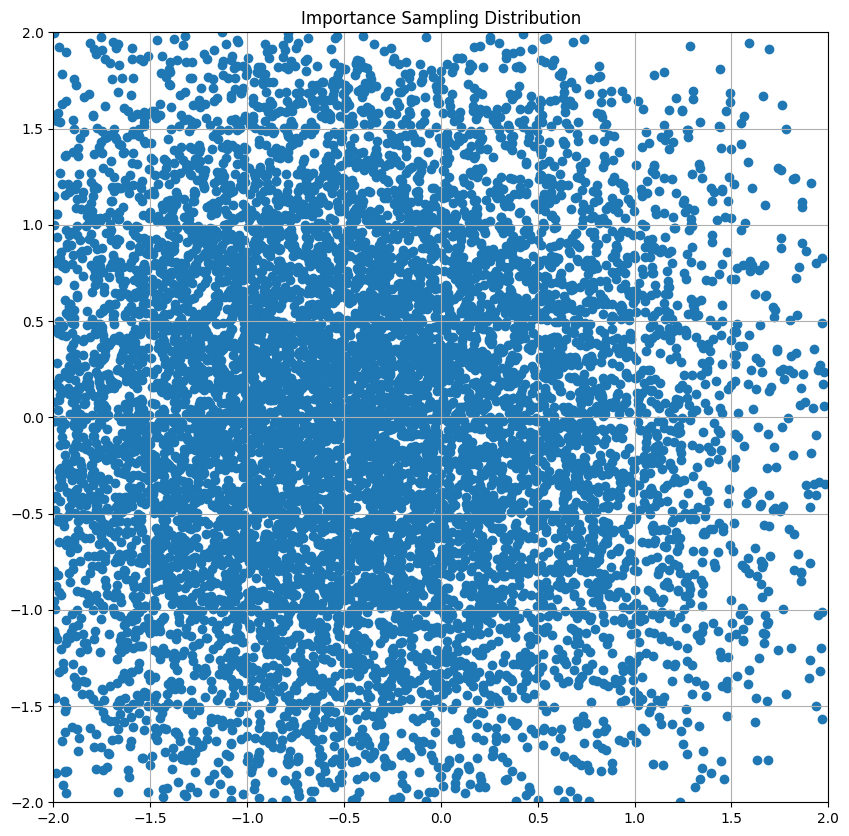

In [144]:
importance_sampling_mandelbrot(n_samples=100000, iters=10, xy_range=(-2, 2))

plot_sampling_distribution()

C:\Users\giorg\AppData\Local\Temp\ipykernel_4224\1602492476.py:41: RuntimeWarning: Mean of empty slice.
  stratum_p = stratum_indicators.mean()
C:\Users\giorg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Monte Carlo Results:
  Mean area: 1.438400
  Standard deviation: 0.453393

Stratified Sampling Results:
  Mean area: nan
  Standard deviation: nan
  Variance reduction vs MC: nanx

Importance Sampling Results:
  Mean area: 1.511829
  Standard deviation: 0.167396
  Variance reduction vs MC: 7.34x
Monte Carlo Results:
  Mean area: 1.495904
  Standard deviation: 0.342807

Stratified Sampling Results:
  Mean area: nan
  Standard deviation: nan
  Variance reduction vs MC: nanx

Importance Sampling Results:
  Mean area: 1.505191
  Standard deviation: 0.121865
  Variance reduction vs MC: 7.91x
Monte Carlo Results:
  Mean area: 1.519424
  Standard deviation: 0.270687

Stratified Sampling Results:
  Mean area: nan
  Standard deviation: nan
  Variance reduction vs MC: nanx

Importance Sampling Results:
  Mean area: 1.505706
  Standard deviation: 0.093598
  Variance reduction vs MC: 8.36x
Monte Carlo Results:
  Mean area: 1.504483
  Standard deviation: 0.231197

Stratified Sampling Results:
  Mea

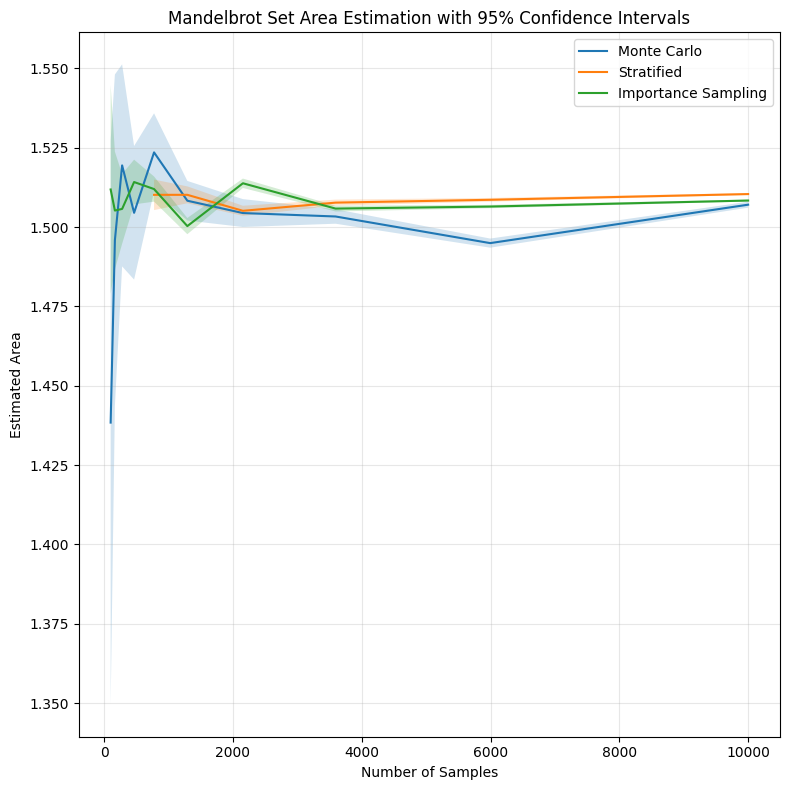

In [ ]:
# Compare all three methods
results = []

for i, n in enumerate(n_sampling_range):
    results.append(compare_all_methods(n_samples=n, n_strata=25, iters=100))

mc_mean = np.array([result[0] for result in results])
strat_mean = np.array([result[2] for result in results])
is_mean = np.array([result[4] for result in results])

mc_var = np.array([result[1] for result in results])
strat_var = np.array([result[3] for result in results])
is_var = np.array([result[5] for result in results])


In [31]:
mc_confint = 1.96 * mc_var**0.5 / np.sqrt(100)
strat_confint = 1.96 * strat_var**0.5 / np.sqrt(100)
is_confint = 1.96 * is_var**0.5 / np.sqrt(100)

Areas: [1.4384     1.49590361 1.51942446 1.50448276 1.52351421 1.50828815
 1.50440111 1.50332313 1.49493493 1.50704   ]
Areas: [       nan        nan        nan        nan 1.510144   1.510144
 1.50510933 1.5076864  1.50857956 1.510384  ]
Areas: [1.51182927 1.50519067 1.50570591 1.51417373 1.51196324 1.50029312
 1.51378478 1.50580899 1.50645074 1.50834253]


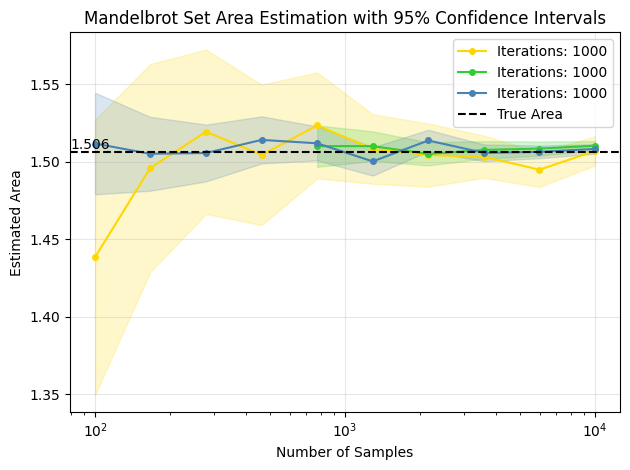

In [32]:
plot_multiple_simulations([1000, 1000, 1000], n_sampling_range, [mc_mean, strat_mean, is_mean], 
                          [mc_confint, strat_confint, is_confint], "comparison")

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

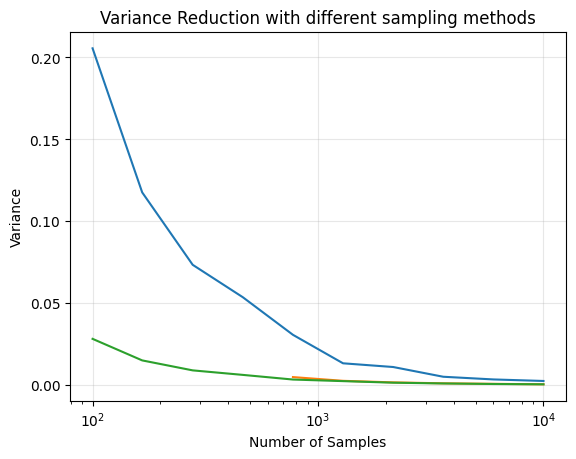

In [36]:
plt.plot(n_sampling_range, mc_var, label="Monte Carlo")
plt.plot(n_sampling_range, strat_var, label="Stratified")
plt.plot(n_sampling_range, is_var, label="Importance Sampling")
plt.xscale('log')
plt.xlabel("Number of Samples")
plt.ylabel("Variance")
plt.title("Variance Reduction with different sampling methods")
plt.legend
plt.grid(True, alpha=0.3)
plt.tight_layout